# Clustering

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("./Mall_Customers.csv")

# 1. EDA & PREPROCESSING

### 데이터 확인 및 column 파악

In [7]:
print(len(data))
data.head()
# 데이터 row 200개 
# CustomerID : Unique ID assigned to the customer
# Gender : Gender of the customer
# Age : Age of the customer
# Annual Income(k$) : Annual Income of the customer
# Spending Score(1~100) : Score assigned by the mall based on customer behavior and spending nature

200


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### 결측치 확인 및 데이터 타입 확인

In [11]:
data.info() #결측치는 없고(굿굿) gender만 범주형 변수 나머지는 수치형 변수임을 알 수 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### 데이터 분포 확인

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018F39EA18D0>,
      dtype=object)

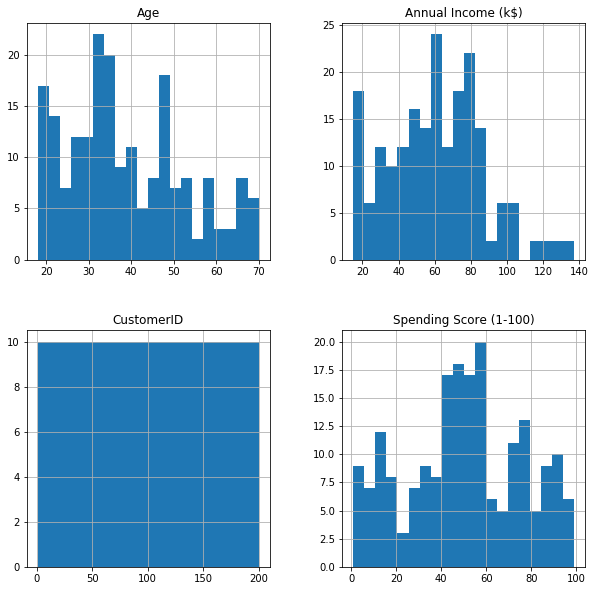

In [16]:
data.hist(bins=20, figsize=(10,10))
# customerID는 id라 의미없는 변수라 제거하고
# age는 어릴수록 많이 분포함을 볼 수 있고
# annualincome은 40 ~ 80사이에 많이 분포
# spending score는 정규분포모형처럼 40 ~ 60사이에 많이 분포함을 볼 수 있다.

In [27]:
data.drop(['CustomerID'], axis=1, inplace=True) # customerID제거

### 명목형 변수 gender 처리

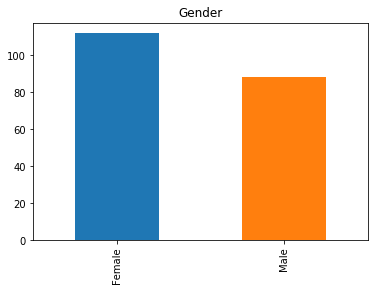

In [22]:
data['Gender'].value_counts().plot(kind='bar')
plt.title('Gender')
plt.show() # 6대4 정도로 보임을 알 수 있다.
data['Gender'] = data['Gender'].apply(lambda x:0 if x == "Female" else 1) #여자는 0 남자는 1로 만들어준다

### 클러스터링 하기 위해서는 거리기준으로 하니 데이터를 0~1 사이로 scaling 해 줄 필요가 있다.

In [39]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
scaler.fit(data)
scaledData = scaler.transform(data)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [44]:
# scaledData를 예쁘게 변환
scaledData = pd.DataFrame(scaledData)
scaledData.columns = data.columns

In [45]:
scaledData.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008197,0.051020
3,0.0,0.096154,0.008197,0.775510
4,0.0,0.250000,0.016393,0.397959


# 2. Clustering

### 2-1 hierarchical Clustering

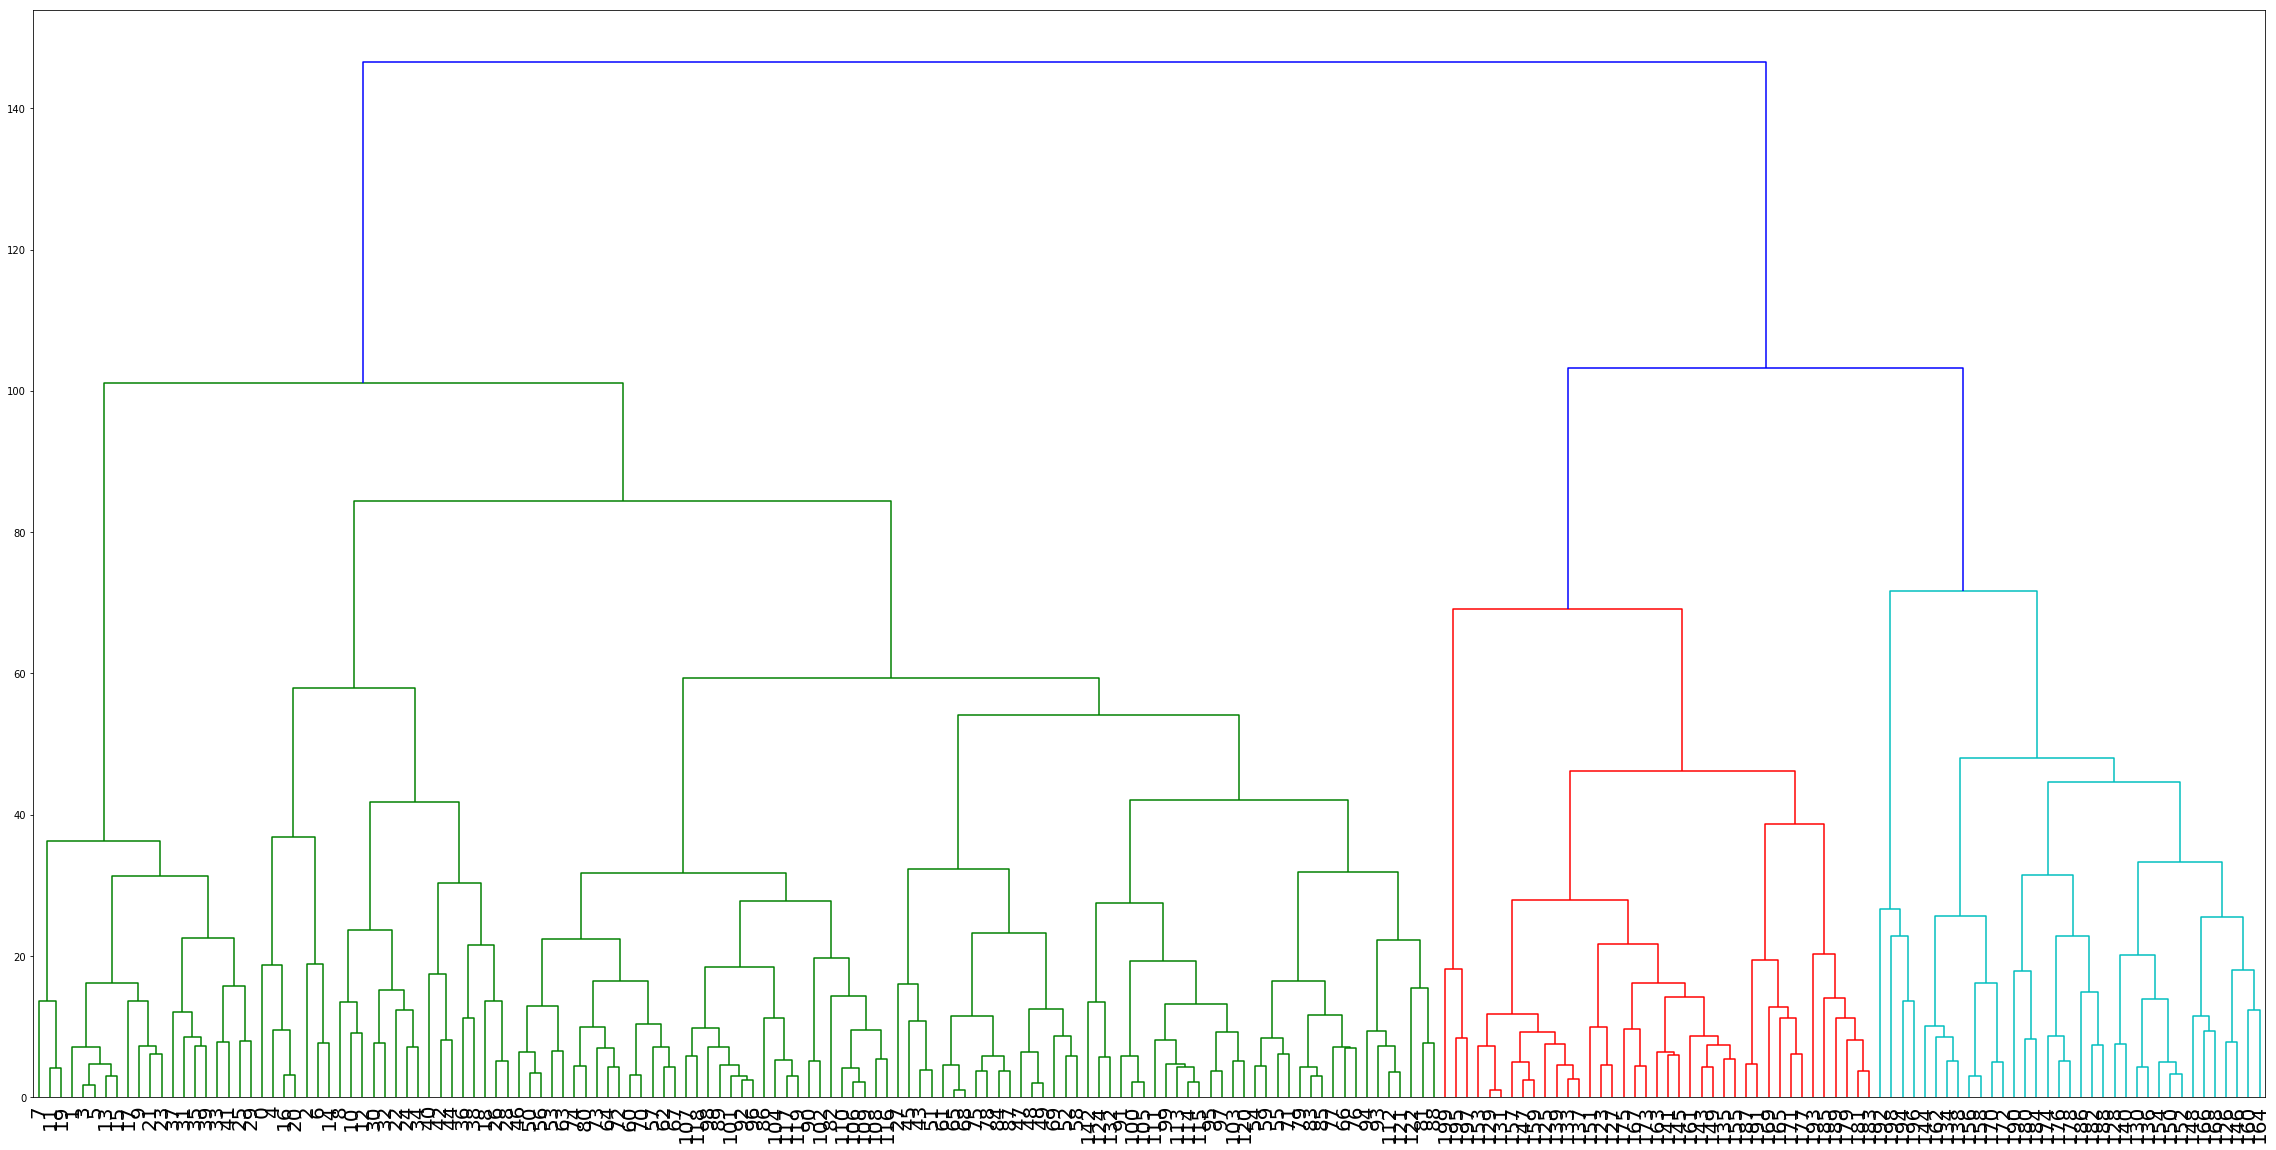

In [47]:
from scipy.cluster.hierarchy import linkage, dendrogram

# MAX(Complete Link)으로 군집-군집 or 군집-개체 간 거리 계산 
links = linkage(data,method='complete')

# Plot the dendrogram
plt.figure(figsize=(40,20))
dendrogram(links,
           leaf_rotation=90,
           leaf_font_size=20,
)
plt.show()

In [48]:
# 교차 분석 결과  
from scipy.cluster.hierarchy import fcluster

predict = pd.DataFrame(fcluster(links,3,criterion='distance'))
predict.columns=['predict']
ct = pd.crosstab(predict['predict'],labels['labels'])
print(ct)

NameError: name 'labels' is not defined